## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

## Importing Dataset

In [4]:
act = 'stand'
file = pd.read_csv(f'../Data/Raw Data/{act}.csv')
file.head()

mac          time         _0             _1             _2  \
0  6c3b6baef921  1.731982e+09  (2048-1j)  (-2049+6144j)  (-7168-7169j)   
1  6c3b6baef921  1.731982e+09  (2048-1j)  (-2049+6144j)  (-7168-7169j)   
2  6c3b6baef921  1.731982e+09  (2048-1j)  (-2049+6144j)  (-7168-7169j)   
3  6c3b6baef921  1.731982e+09  (2048-1j)  (-2049+6144j)  (-7168-7169j)   
4  6c3b6baef921  1.731982e+09  (2048-1j)  (-2049+6144j)  (-7168-7169j)   

              _3           _4           _5           _6           _7  ...  \
0  (-1024-5120j)   (790-833j)  (210-1062j)  (-395-946j)  (-892-379j)  ...   
1  (-1024-5120j)   (-715+34j)  (-660+334j)  (-479+583j)  (-123+707j)  ...   
2  (-1024-5120j)  (-598-579j)  (-679-404j)  (-717-218j)   (-715+39j)  ...   
3  (-1024-5120j)  (-845-123j)  (-788+139j)  (-661+359j)  (-410+583j)  ...   
4  (-1024-5120j)  (-731+278j)  (-632+446j)  (-501+581j)  (-286+682j)  ...   

           _54          _55          _56          _57          _58  \
0    (642+74j)   (612-334j)   (313-675j)  (-207-734j)  (-631-426j)   
1  (-164-464j)  (-352-397j)  (-499-241j)    (-564-8j)  (-505+234j)   
2   (344+354j)   (429+295j)   (509+201j)    (561+57j)   (559-110j)   
3   (175+459j)   (322+416j)   (465+298j)   (555+105j)   (556-124j)   
4    (460+14j)    (511-70j)   (531-182j)   (501-317j)   (409-442j)   

           _59         _60              _61       _62           _63  
0   (-791-58j)  (10245+0j)  (-12544-32640j)  (128+0j)  (1719-3250j)  
1  (-323+376j)  (10245+0j)  (-12288-32640j)  (128+0j)  (1719-3250j)  
2   (534-253j)  (10245+0j)  (-12288-32640j)  (128+0j)  (1719-3250j)  
3   (515-312j)  (10245+0j)  (-12288-32640j)  (128+0j)  (1719-3250j)  
4   (290-527j)  (10245+0j)  (-12288-32640j)  (128+0j)  (1719-3250j)  

[5 rows x 66 columns]

## Extract only Amplitude

In [5]:
def amplitude_only(file):
    amplitudes = pd.DataFrame()
    
    for col in file.columns[2:]:
        complex_num = file[col].apply(lambda x: complex(x.strip("()")))
        amplitudes[col] = np.abs(complex_num)
    
    return amplitudes

In [6]:
amp = amplitude_only(file)
amp.head()

_0           _1            _2           _3           _4  \
0  2048.000244  6476.660945  10137.789947  5221.395982  1148.037020   
1  2048.000244  6476.660945  10137.789947  5221.395982   715.807935   
2  2048.000244  6476.660945  10137.789947  5221.395982   832.373113   
3  2048.000244  6476.660945  10137.789947  5221.395982   853.905147   
4  2048.000244  6476.660945  10137.789947  5221.395982   782.077362   

            _5           _6          _7          _8          _9  ...  \
0  1082.563624  1025.154135  969.177486  913.777325  845.681973  ...   
1   739.699939   754.539595  717.619676  664.605898  616.280780  ...   
2   790.099361   749.408433  716.062846  656.629271  613.931592  ...   
3   800.165608   752.198112  712.733471  662.589617  617.370229  ...   
4   773.524402   767.177945  739.540398  717.958912  672.595718  ...   

          _54         _55         _56         _57         _58         _59  \
0  646.250725  697.208721  744.038977  762.630317  761.338952  793.123572   
1  492.130064  530.577987  554.149799  564.056735  556.579734  495.686393   
2  493.611183  520.639991  547.249486  563.888287  569.720107  590.901853   
3  491.229071  526.060833  552.294306  564.845112  569.659547  602.137028   
4  460.212994  515.772237  561.324327  592.865921  602.200133  601.522236   

       _60           _61    _62          _63  
0  10245.0  34967.435365  128.0  3676.609987  
1  10245.0  34876.418165  128.0  3676.609987  
2  10245.0  34876.418165  128.0  3676.609987  
3  10245.0  34876.418165  128.0  3676.609987  
4  10245.0  34876.418165  128.0  3676.609987  

[5 rows x 64 columns]

## Subcarrier Removal

In [7]:
def remove_subcarrier(amplitude):
    columns_to_remove = ['_0', '_1', '_2', '_3', '_32', '_61', '_62', '_63', '_11', '_25', '_39', '_53']
    
    return amplitude.drop(columns=columns_to_remove)

In [8]:
rem = remove_subcarrier(amp)
rem.head()

_4           _5           _6          _7          _8          _9  \
0  1148.037020  1082.563624  1025.154135  969.177486  913.777325  845.681973   
1   715.807935   739.699939   754.539595  717.619676  664.605898  616.280780   
2   832.373113   790.099361   749.408433  716.062846  656.629271  613.931592   
3   853.905147   800.165608   752.198112  712.733471  662.589617  617.370229   
4   782.077362   773.524402   767.177945  739.540398  717.958912  672.595718   

          _10         _12         _13         _14  ...         _50  \
0  780.800871  724.995172  753.016600  796.645467  ...  369.770199   
1  579.976724  553.022604  566.056534  600.221626  ...  294.767705   
2  574.739071  546.788807  569.759598  605.417212  ...  298.390684   
3  581.485167  545.189875  563.071931  601.153890  ...  299.848295   
4  639.507623  559.303138  544.033087  548.629201  ...  203.867604   

          _51         _52         _54         _55         _56         _57  \
0  438.360582  511.856425  646.250725  697.208721  744.038977  762.630317   
1  341.568441  400.921439  492.130064  530.577987  554.149799  564.056735   
2  346.802537  396.273895  493.611183  520.639991  547.249486  563.888287   
3  345.671810  400.475967  491.229071  526.060833  552.294306  564.845112   
4  264.017045  331.581061  460.212994  515.772237  561.324327  592.865921   

          _58         _59      _60  
0  761.338952  793.123572  10245.0  
1  556.579734  495.686393  10245.0  
2  569.720107  590.901853  10245.0  
3  569.659547  602.137028  10245.0  
4  602.200133  601.522236  10245.0  

[5 rows x 52 columns]

## DF to Numpy

In [9]:
def readamp(removed):

    # converts element of dataframe to numeric value and due to 'coerece' non-numeric values is converted to NaN
    df = removed.apply(pd.to_numeric, errors='coerce')
    
    df = np.nan_to_num(df) # NaN is replaced with 0

    dfs = df[:, :]

    return dfs

In [10]:
amplitude = readamp(rem)
amplitude

array([[ 1148.03702031,  1082.563624  ,  1025.15413475, ...,
          761.33895211,   793.12357171, 10245.        ],
       [  715.80793513,   739.69993916,   754.53959472, ...,
          556.57973373,   495.68639279, 10245.        ],
       [  832.37311345,   790.09936084,   749.40843337, ...,
          569.72010672,   590.9018531 , 10245.        ],
       ...,
       [ 1038.55524648,  1039.27137938,  1016.09645211, ...,
         1176.05527081,  1186.31235347, 33356.58933404],
       [ 1043.88696706,  1039.72400184,  1020.68310459, ...,
         1174.82424217,  1183.56453141, 33356.58933404],
       [ 1048.83411462,  1036.92815566,  1021.5659548 , ...,
         1181.18584482,  1184.39604863, 33356.58933404]])

### Hample Filter

In [11]:
def hampel(removed, k=5, t0=123, outliers_return=False):
    

    values = pd.Series(removed.copy())

    # Hampel Filter
    L = 1.4826

    rolling_median = values.rolling(k).median()
    difference = np.abs(rolling_median - values)
    median_abs_deivation = difference.rolling(k).median()

    threshold = t0 * L * median_abs_deivation
    outlier_idx = difference > threshold
    values[outlier_idx] = rolling_median

    if outliers_return:
        return values, outlier_idx

    return values

### NumPy Array Initialization

In [12]:
def filter_hampel(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = hampel(numeric[:, i], k=5, t0=1.5)[:data] # replaces filtered data in same column
    
    return res

In [13]:
result = filter_hampel(amplitude)
result

array([[ 1148.03702031,  1082.563624  ,  1025.15413475, ...,
          761.33895211,   793.12357171, 10245.        ],
       [  715.80793513,   739.69993916,   754.53959472, ...,
          556.57973373,   495.68639279, 10245.        ],
       [  832.37311345,   790.09936084,   749.40843337, ...,
          569.72010672,   590.9018531 , 10245.        ],
       ...,
       [ 1046.44971212,  1049.46176681,  1016.09645211, ...,
         1176.05527081,  1186.31235347, 33356.58933404],
       [ 1043.88696706,  1039.72400184,  1020.68310459, ...,
         1174.82424217,  1183.56453141, 33356.58933404],
       [ 1048.83411462,  1036.92815566,  1021.5659548 , ...,
         1181.18584482,  1184.39604863, 33356.58933404]])

## Discrete Wavelet Transform (DWT) (Denoising)

In [14]:
def dwt(hampeled, t1=0.19):
    threshold = t1

    hamp = hampeled.copy()

    window = pywt.Wavelet('sym5')
    max_level = pywt.dwt_max_level(hamp.shape[0], window.dec_len)

    coeffs = pywt.wavedec(hamp, 'sym5', level=max_level)

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

    denoise = pywt.waverec(coeffs, 'sym5')

    return denoise

In [15]:
def dwt2(hampeled, t1=0.19):
    threshold = t1

    hamp = hampeled.copy()

    window = pywt.Wavelet('haar')
    max_level = pywt.dwt_max_level(hamp.shape[0], window.dec_len)

    coeffs = pywt.wavedec(hamp, 'haar', level=max_level)

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

    denoise = pywt.waverec(coeffs, 'haar')

    return denoise

### NumPy Array Initialization

In [16]:
def filter_dwt(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = dwt(numeric[:, i], t1=0.2)[:data] # replaces filtered data in same column
    
    return res

In [17]:
denoised = filter_dwt(amplitude)
denoised

array([[  873.68440044,   915.92437521,   884.37342993, ...,
          618.32955348,   653.25127994, 10303.29304559],
       [  875.76393835,   800.27273155,   777.78510705, ...,
          602.89123073,   534.84278202, 10301.06353507],
       [  879.75994824,   814.49054966,   774.68519901, ...,
          584.63226915,   602.08630631, 10289.6279924 ],
       ...,
       [ 1012.87903216,  1011.19725896,   990.72389364, ...,
         1147.99154599,  1150.28438281, 31776.14663598],
       [ 1014.54394449,  1014.69552615,   994.48375953, ...,
         1152.14005005,  1154.58552856, 32339.22097196],
       [ 1016.15101103,  1018.0897446 ,   998.13999135, ...,
         1155.46733757,  1158.29380252, 32790.47065269]])

## Hampel & DWT Filter

In [18]:
def filter(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = dwt(hampel(numeric[:, i], k=5, t0=2.5), t1=0.2)[:data] # replaces filtered data in same column
    
    return res

In [19]:
filtered = filter(amplitude)
filtered

array([[ 1040.15567065,   970.92267355,   914.74109645, ...,
          651.67422651,   695.08729148, 10244.81378793],
       [  730.58677562,   736.59127159,   741.25922149, ...,
          543.93605968,   498.32063506, 10244.79723363],
       [  853.88230634,   805.79074511,   761.0639359 , ...,
          574.93888948,   603.00943486, 10244.78021863],
       ...,
       [ 1025.48897104,  1016.83112092,   997.34349133, ...,
         1142.43651736,  1148.76305448, 31298.96479957],
       [ 1026.84921789,  1018.85277832,  1000.28062234, ...,
         1147.72944382,  1155.36677624, 32240.92113739],
       [ 1028.16652818,  1020.879585  ,  1003.18984298, ...,
         1151.82528983,  1160.42497577, 32939.97392464]])

## Hampel Output Visualization

In [20]:
def hampel_all(num, k=3, t0=123):
    data = num.shape[0]
    
    res = np.zeros_like(num)
    outliers = []

    for i in range(num.shape[1]):
        res[:data, i], out = hampel(num[:, i], k, t0, outliers_return=True)[:data]
        outliers.append(out)
        
    return res, outliers

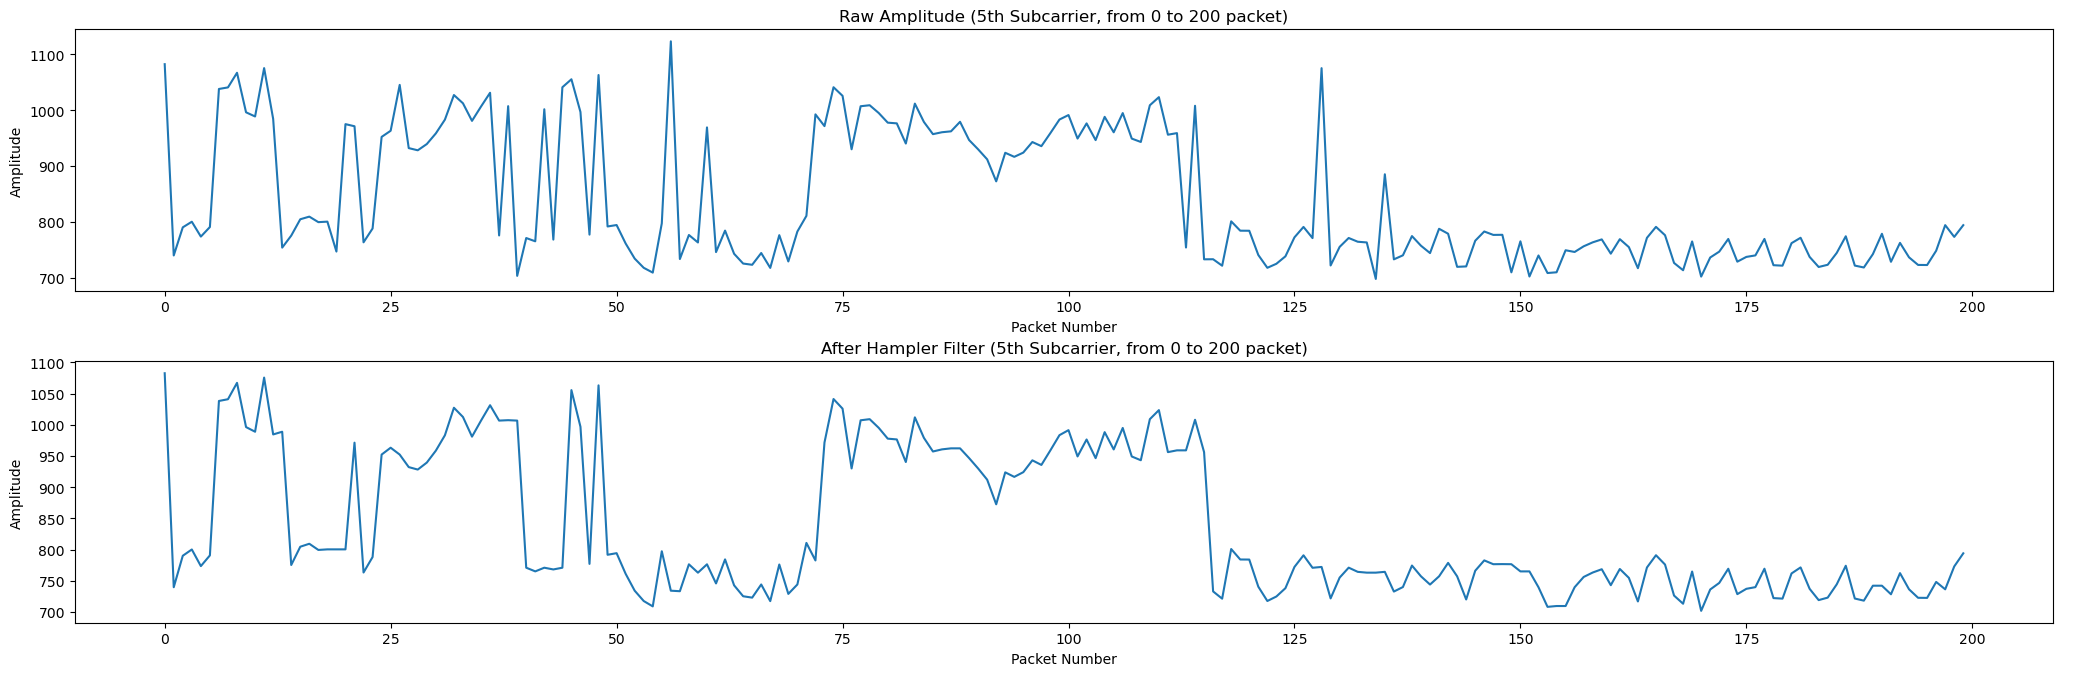

In [30]:
fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

SUBCARRIES_NUM = 52

no_hampel = amplitude
with_hampel, outliers = hampel_all(no_hampel, k=5, t0=3)

ax3 = fig.add_subplot(211)
plt.plot((no_hampel)[:200, 1])
ax3.set_title("Raw Amplitude (5th Subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot(with_hampel[:200, 1])
ax4.set_title("After Hampler Filter (5th Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax3.set_ylabel('Amplitude')
ax4.set_ylabel('Amplitude')
ax3.set_xlabel('Packet Number')
ax4.set_xlabel('Packet Number')

fig.tight_layout(pad=0.5)
plt.show()

## DWT Output Visualization

In [31]:
def dwt_all(num, t1=0.19):
    data = num.shape[0]

    res = np.zeros_like(num)

    for i in range(num.shape[1]):
        res[:data, i] = dwt(num[:, i], t1)[:data]
    
    return res

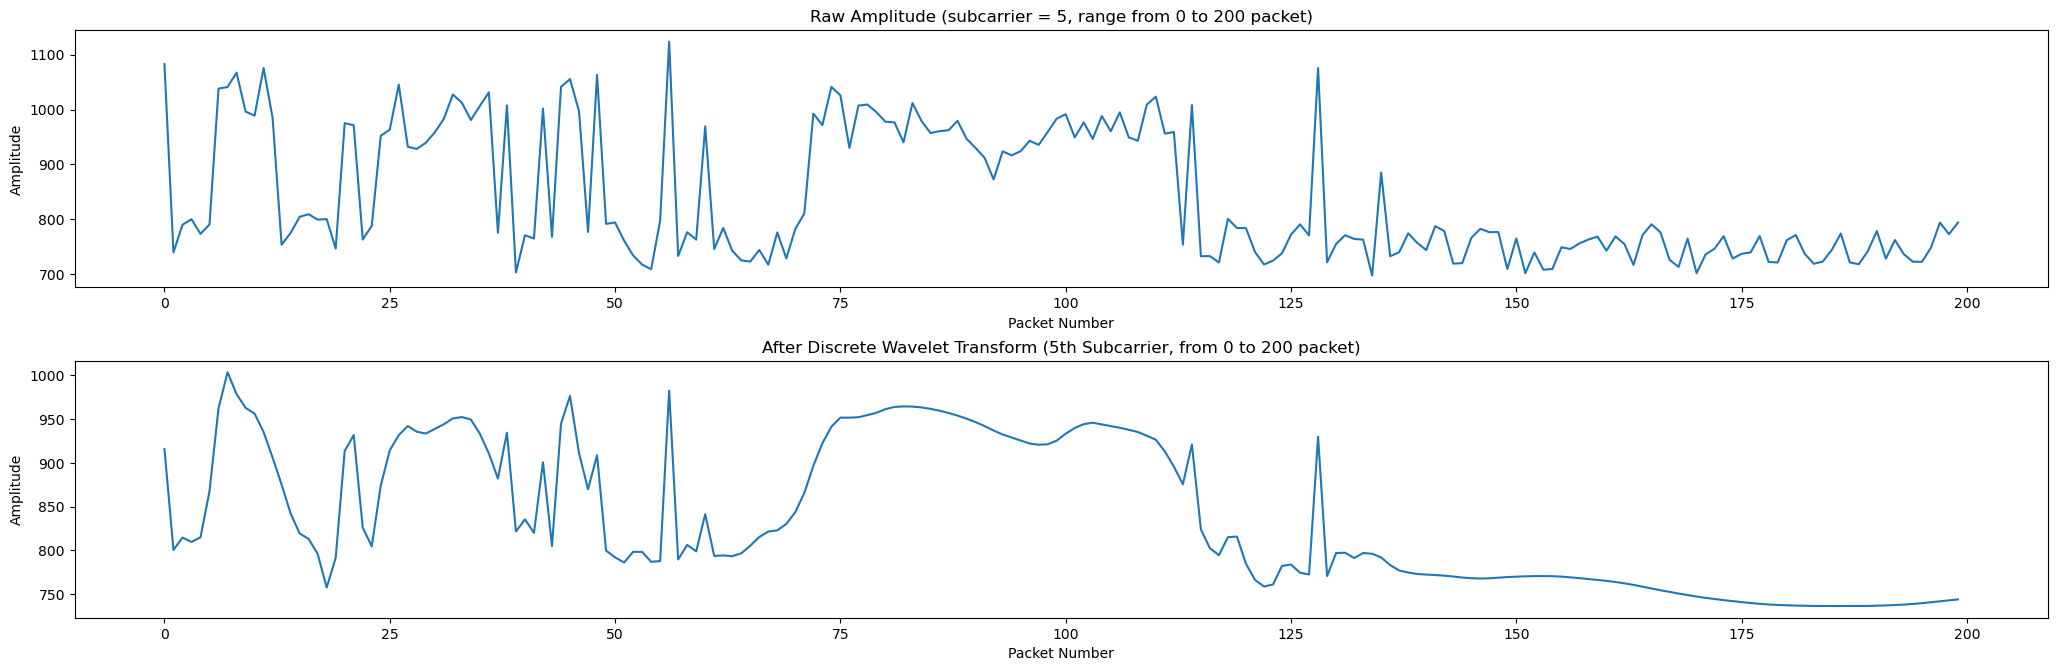

In [32]:
fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

no_denoise = amplitude
dwt_filter = dwt_all(no_denoise, t1=0.2)

ax3 = fig.add_subplot(211)
plt.plot((no_denoise)[:200, 1])
ax3.set_title("Raw Amplitude (subcarrier = 5, range from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot(dwt_filter[:200, 1])
ax4.set_title("After Discrete Wavelet Transform (5th Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax3.set_ylabel('Amplitude')
ax4.set_ylabel('Amplitude')
ax3.set_xlabel('Packet Number')
ax4.set_xlabel('Packet Number')

fig.tight_layout(pad=0.7)
plt.show()

## Hampel & DWT Output Visualization

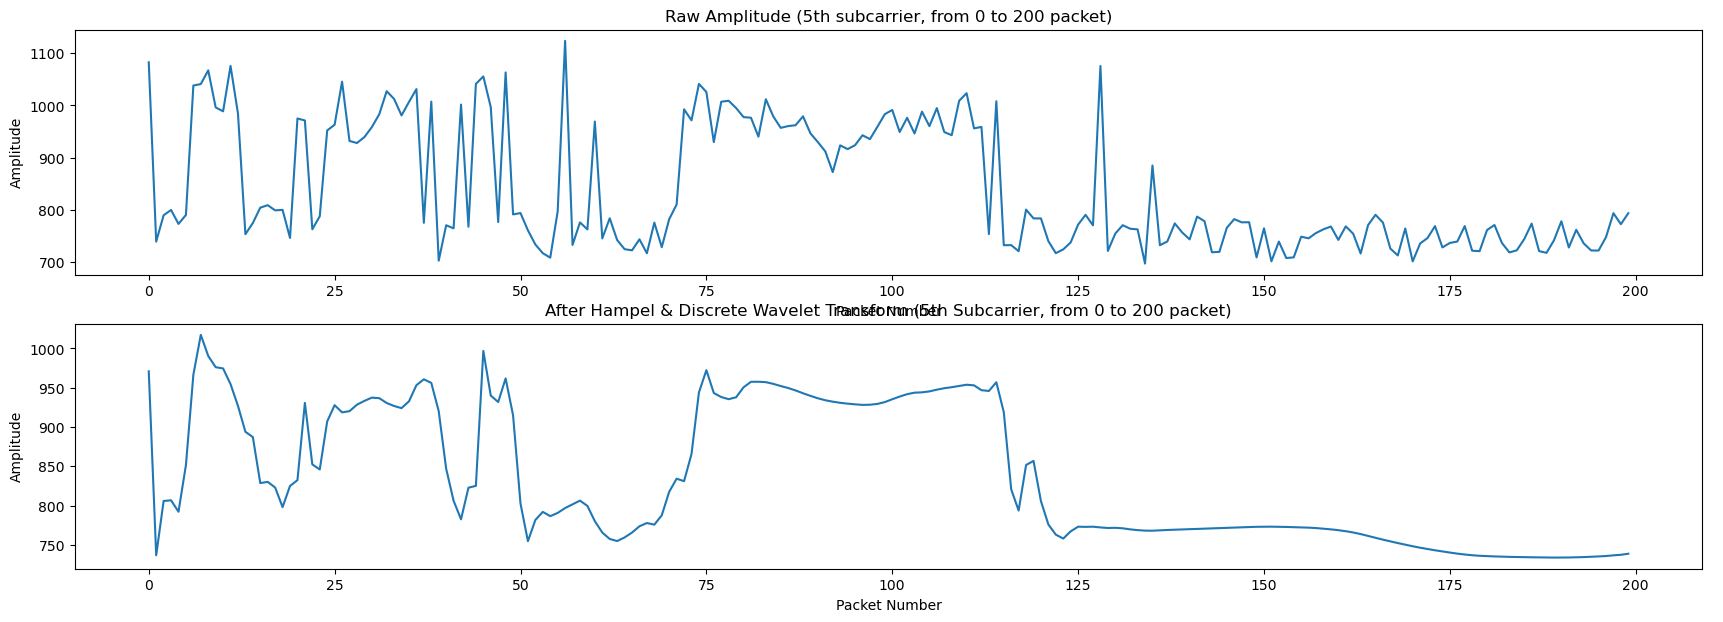

In [33]:
fig = plt.figure(figsize = (21,7))
ax = fig.add_subplot(111)

no_filter = amplitude
with_filter = filter(no_filter)

ax3 = fig.add_subplot(211)
plt.plot((no_filter)[:200, 1])
ax3.set_title("Raw Amplitude (5th subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot((with_filter)[:200, 1])
ax4.set_title("After Hampel & Discrete Wavelet Transform (5th Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax3.set_ylabel('Amplitude')
ax4.set_ylabel('Amplitude')
ax3.set_xlabel('Packet Number')
ax4.set_xlabel('Packet Number')

plt.show()

## Hampel vs DWT Comparison

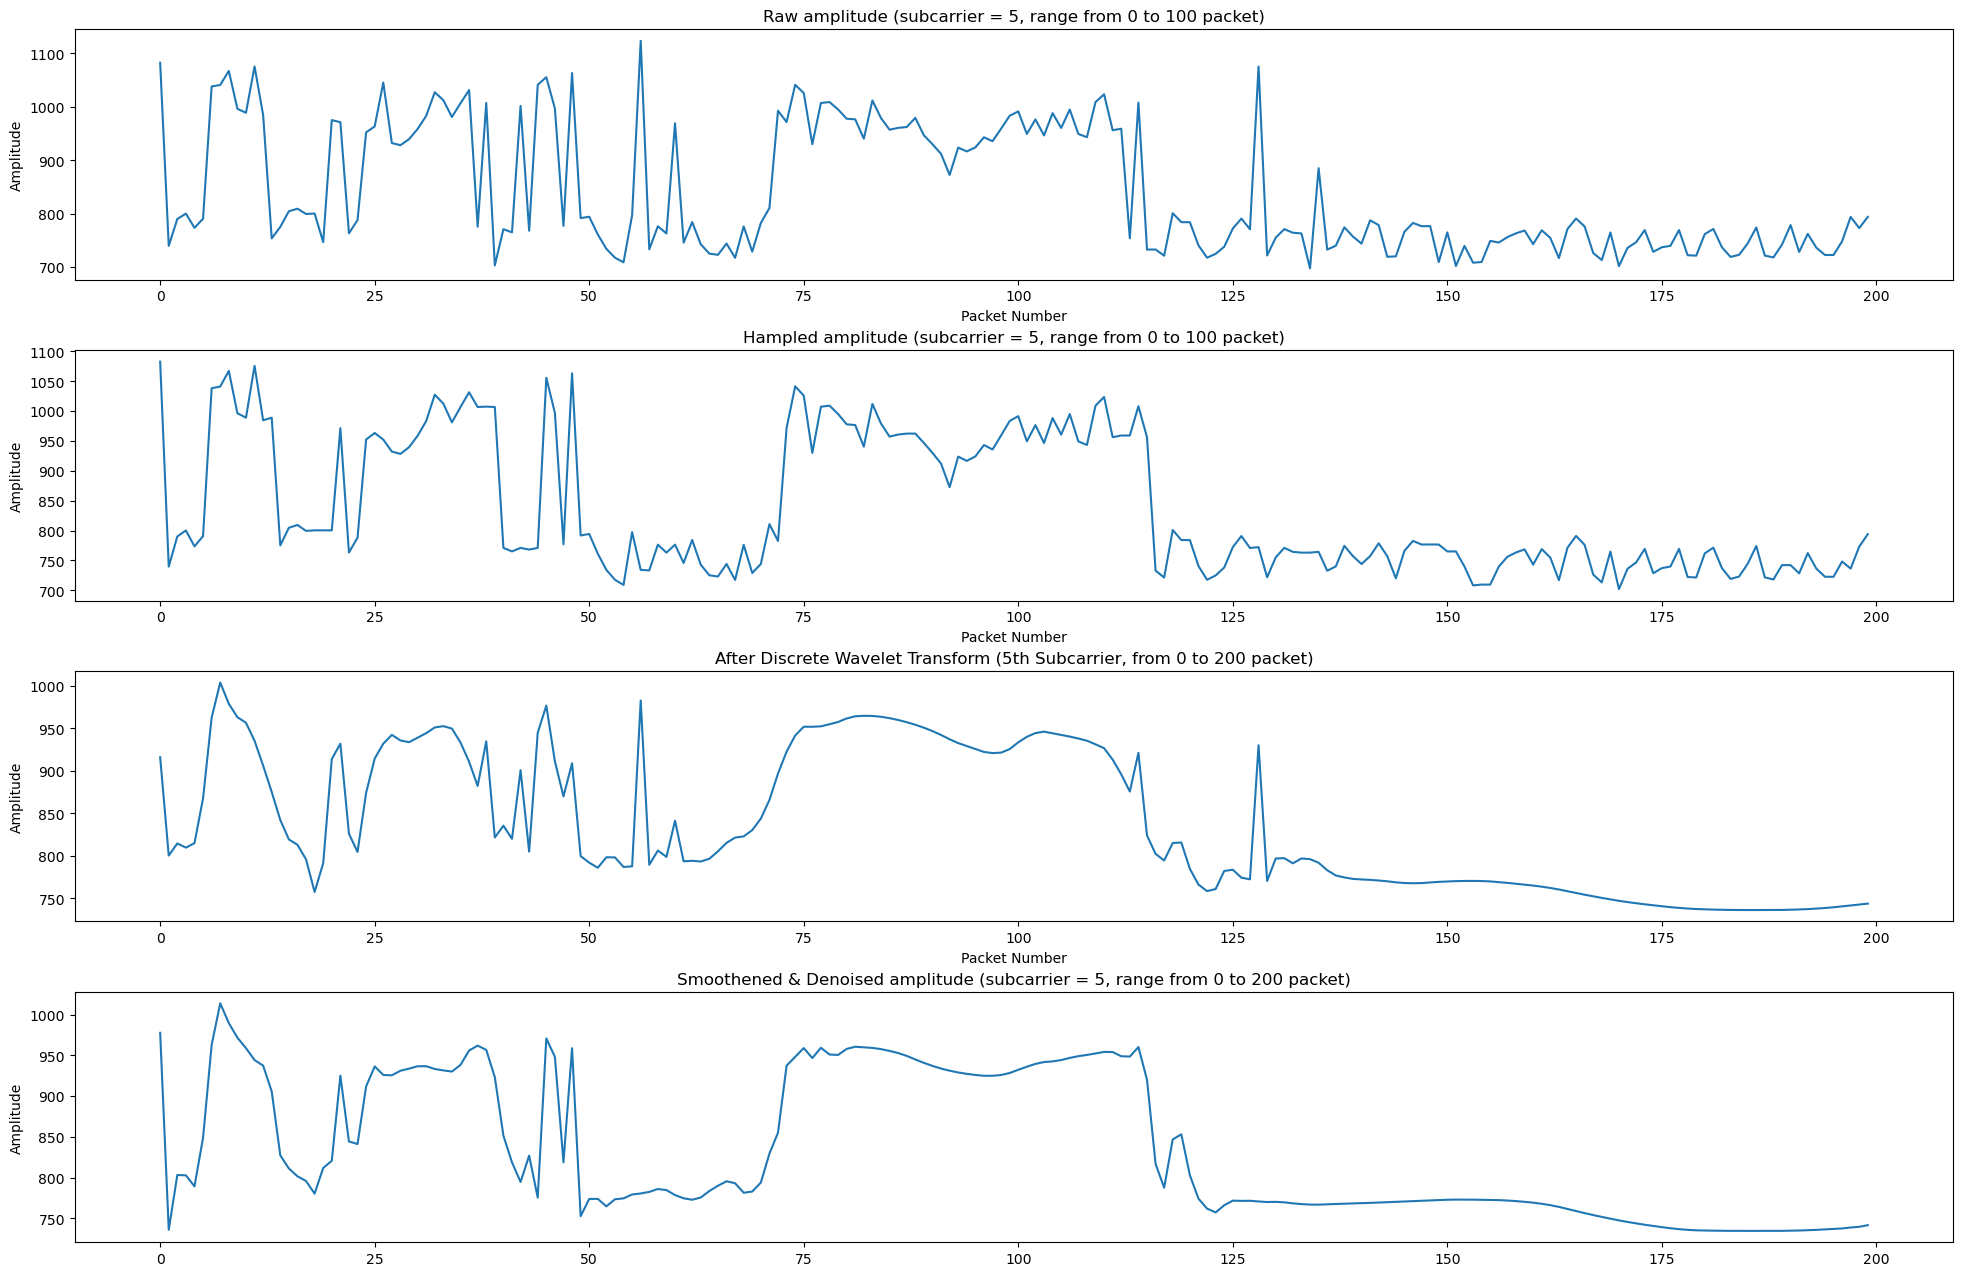

In [25]:
fig = plt.figure(figsize = (20, 13))
ax = fig.add_subplot(111)

SUBCARRIES_NUM = 52

no_hampel = amplitude
with_hampel, outliers = hampel_all(no_hampel, k=5, t0=3)

no_denoise = with_hampel
with_denoise = dwt_all(no_denoise)

ax1 = fig.add_subplot(411)
plt.plot((no_hampel)[:200, 1])
ax1.set_title("Raw amplitude (subcarrier = 5, range from 0 to 100 packet)")

ax2 = fig.add_subplot(412)
plt.plot(with_hampel[:200, 1])
ax2.set_title("Hampled amplitude (subcarrier = 5, range from 0 to 100 packet)")

ax3 = fig.add_subplot(413)
plt.plot(dwt_filter[:200, 1])
ax3.set_title("After Discrete Wavelet Transform (5th Subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(414)
plt.plot((with_denoise)[:200, 1])
ax4.set_title("Smoothened & Denoised amplitude (subcarrier = 5, range from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Amplitude')
ax3.set_ylabel('Amplitude')
ax4.set_ylabel('Amplitude')
ax1.set_xlabel('Packet Number')
ax2.set_xlabel('Packet Number')
ax3.set_xlabel('Packet Number')

fig.tight_layout(pad=0.5)
plt.show()

## Smoothen All Subcarrier (Hampel)

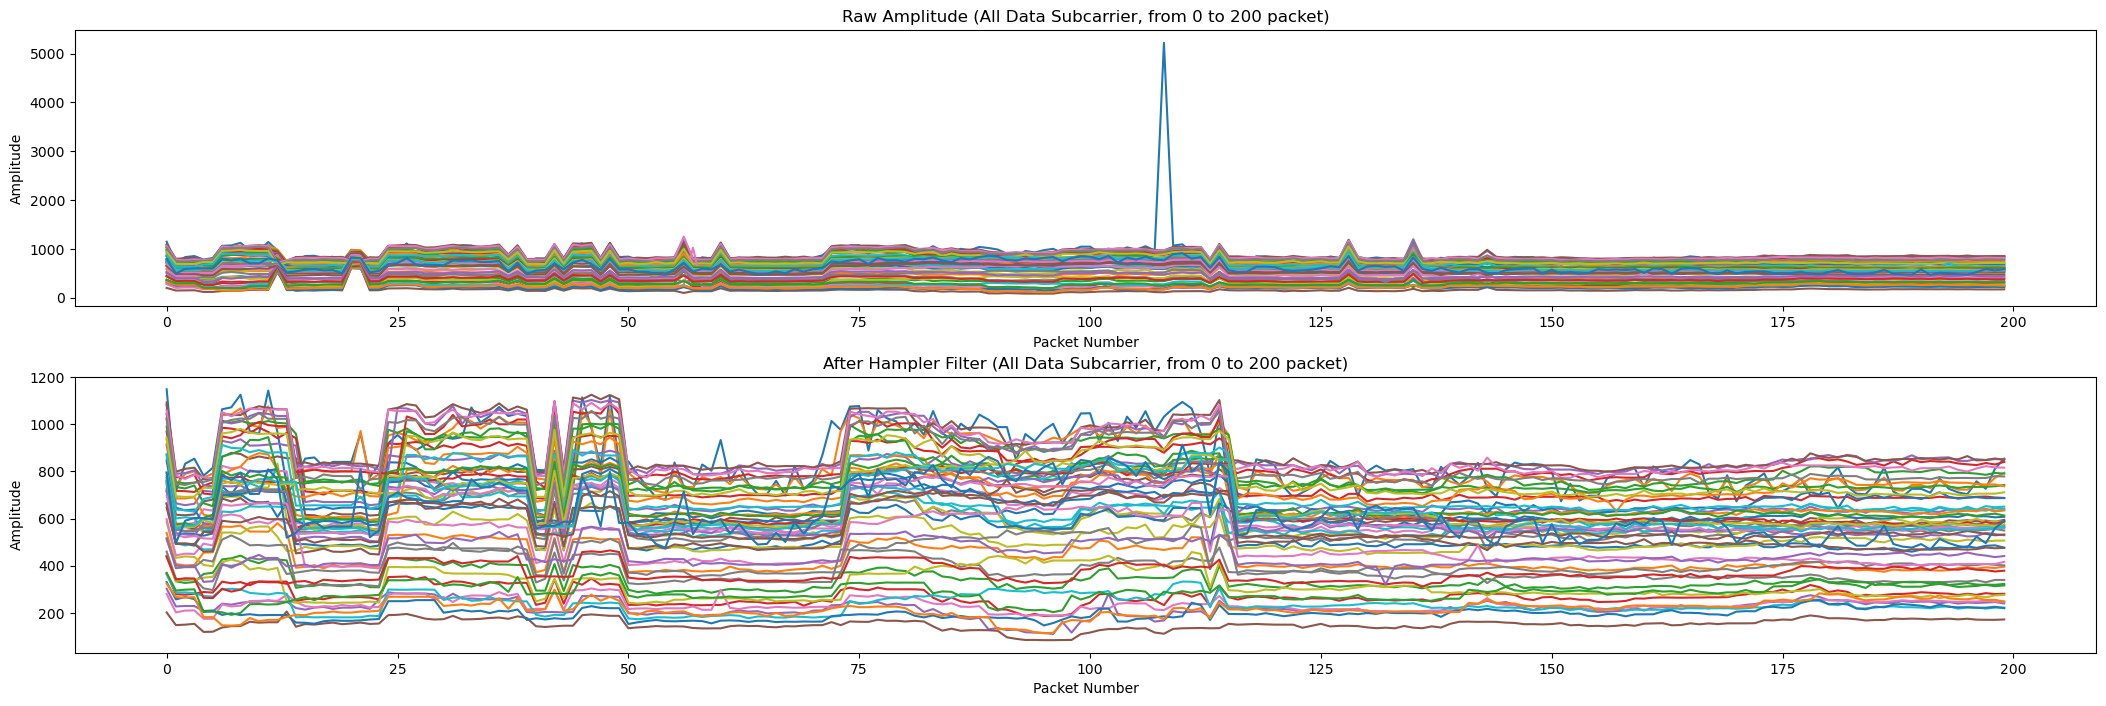

In [26]:
fig = plt.figure(figsize = (21, 7))

no_hampel = amplitude
with_hampel, outliers = hampel_all(no_hampel, k=5, t0=3)

ax3 = fig.add_subplot(211)
plt.plot((no_hampel)[:200, :-1])
ax3.set_title("Raw Amplitude (All Data Subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot(with_hampel[:200, :-1])
ax4.set_title("After Hampler Filter (All Data Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax3.set_ylabel('Amplitude')
ax4.set_ylabel('Amplitude')
ax3.set_xlabel('Packet Number')
ax4.set_xlabel('Packet Number')

fig.tight_layout(pad=0.5)
plt.show()

## Denoise All Subcarrier (DWT)

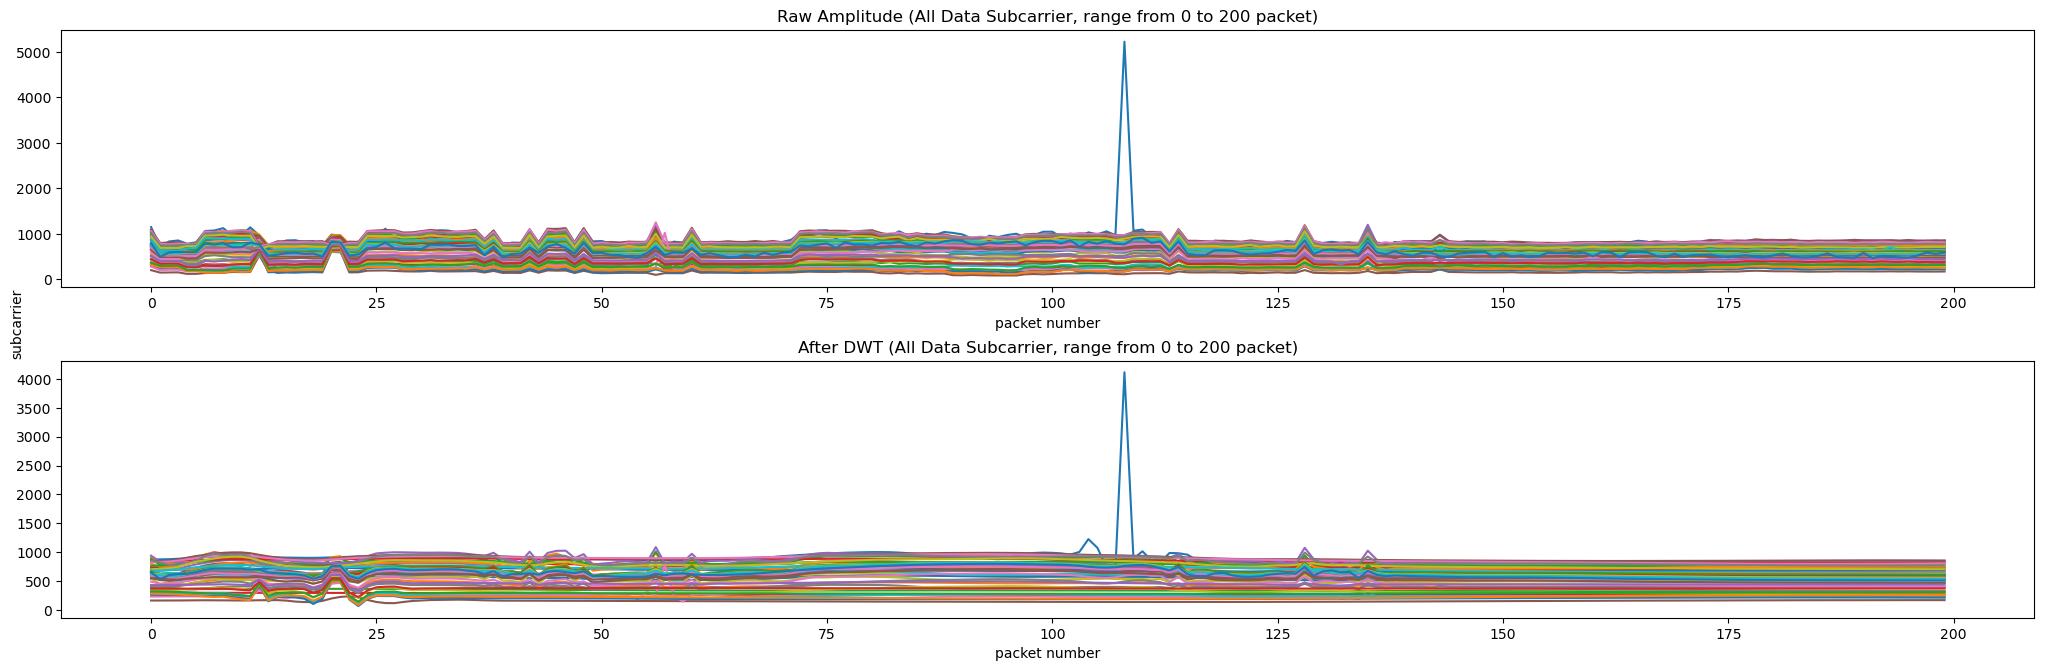

In [27]:
fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

no_denoise = amplitude
dwt_filter = dwt_all(no_denoise, t1=0.2)

ax3 = fig.add_subplot(211)
plt.plot((no_denoise)[:200, :-1])
ax3.set_title("Raw Amplitude (All Data Subcarrier, range from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot(dwt_filter[:200, :-1])
ax4.set_title("After DWT (All Data Subcarrier, range from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.7)
plt.show()

## Hampel & DWT All Subcarrier

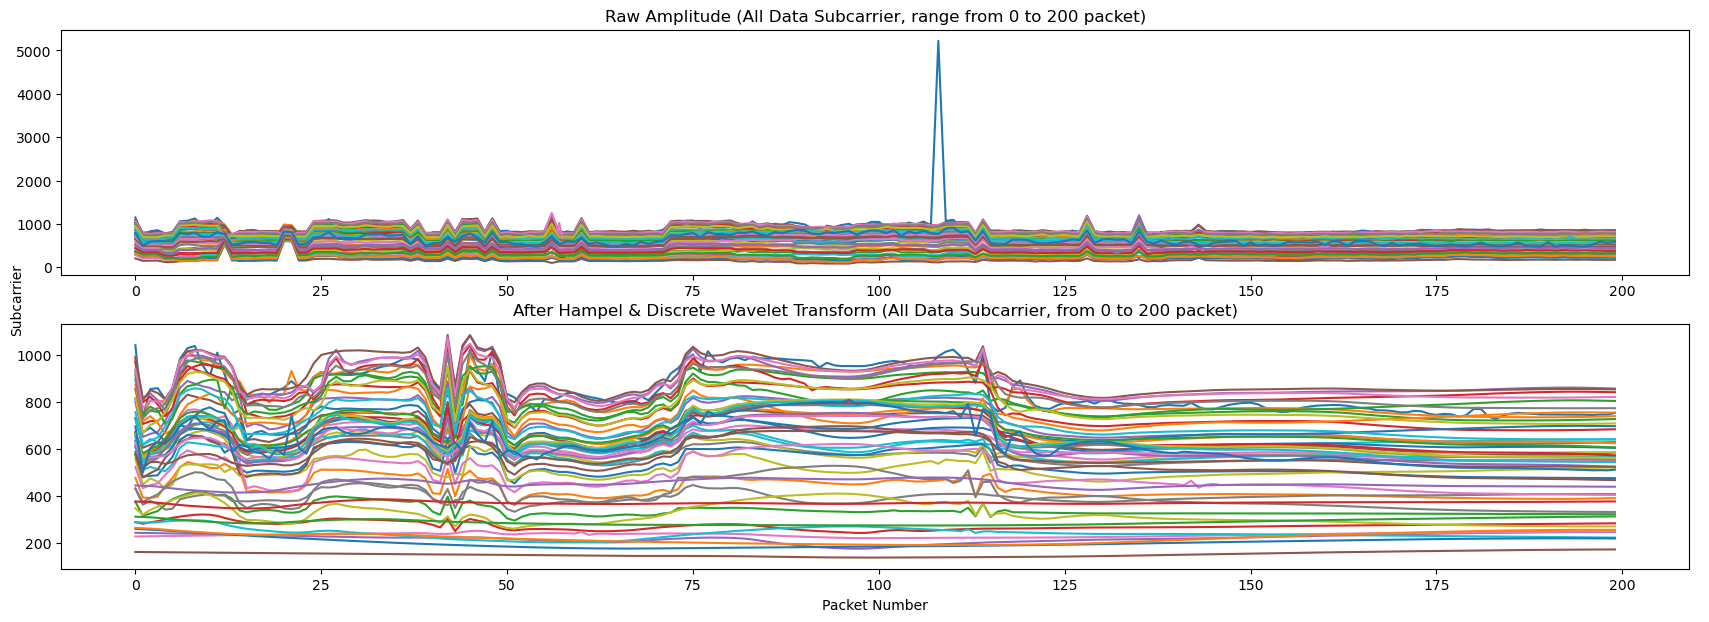

In [28]:
fig = plt.figure(figsize = (21,7))
ax = fig.add_subplot(111)

no_filter = amplitude
with_filter = filter(no_filter)

ax3 = fig.add_subplot(211)
plt.plot((no_filter)[:200, :-1])
ax3.set_title("Raw Amplitude (All Data Subcarrier, range from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot((with_filter)[:200, :-1])
ax4.set_title("After Hampel & Discrete Wavelet Transform (All Data Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('Subcarrier')
ax.set_xlabel('Packet Number')

plt.show()

## Raw Vs Hampel Vs DWT Vs Filtered All Subcarrier

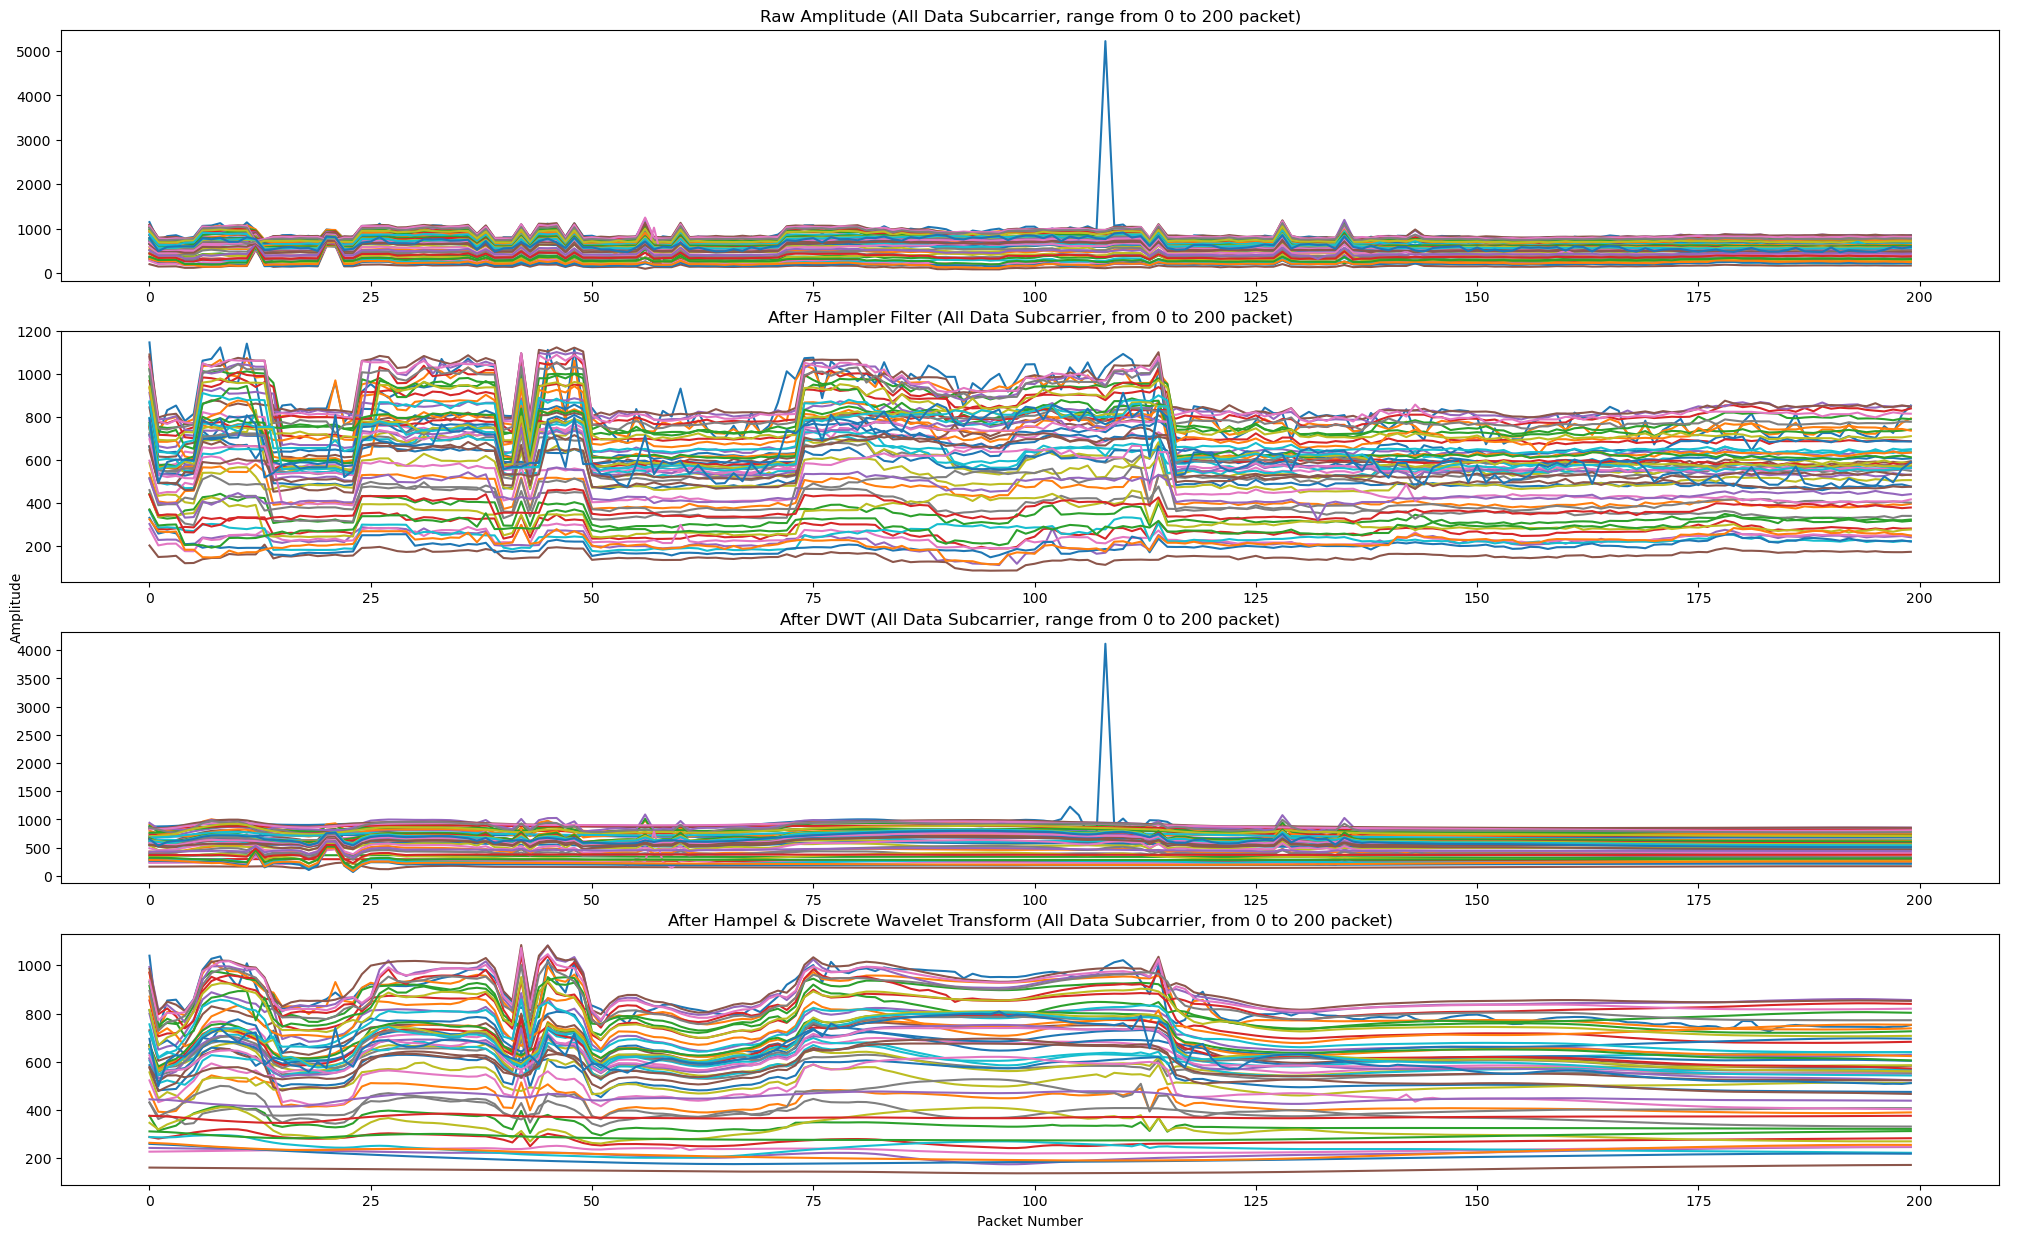

In [29]:
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111)

no_filter = amplitude
with_hampel, outliers = hampel_all(no_filter, k=5, t0=3)
dwt_filter = dwt_all(no_filter, t1=0.2)
with_filter = filter(no_filter)

ax1 = fig.add_subplot(411)
plt.plot((no_filter)[:200, :-1])
ax1.set_title("Raw Amplitude (All Data Subcarrier, range from 0 to 200 packet)")

ax2 = fig.add_subplot(412)
plt.plot(with_hampel[:200, :-1])
ax2.set_title("After Hampler Filter (All Data Subcarrier, from 0 to 200 packet)")

ax3 = fig.add_subplot(413)
plt.plot(dwt_filter[:200, :-1])
ax3.set_title("After DWT (All Data Subcarrier, range from 0 to 200 packet)")

ax4 = fig.add_subplot(414)
plt.plot((with_filter)[:200, :-1])
ax4.set_title("After Hampel & Discrete Wavelet Transform (All Data Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('Amplitude')
ax.set_xlabel('Packet Number')

plt.show()